In [1]:
from pycoingecko import CoinGeckoAPI
from pprint import pprint
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Get data from CoinGecko API

Pull the first 5 pages of coin data from the API.

In [2]:
cg = CoinGeckoAPI()

pages = [1, 2, 3, 4, 5]

coins = []
for page in pages:
    results = cg.get_coins_markets("usd", page=page)
    for coin in results:
        coins.append(coin)

In [34]:
df = pd.DataFrame(columns=["Name", "Symbol", "Price", "MarketCap", "FullyDilutedValuation", "Rank", "Volume", "ATHChangePercent"])

for idx, coin in enumerate(coins):
    df.loc[idx] = [coin["name"], coin["symbol"].upper(), coin["current_price"], coin["market_cap"], coin["fully_diluted_valuation"], 
                   coin["market_cap_rank"], coin["total_volume"], coin["ath_change_percentage"]]

In [35]:
df["MarketCap"] /= 1e9
df["FullyDilutedValuation"] /= 1e9
df["FDVtoMCAP_Ratio"] = df["FullyDilutedValuation"] / df["MarketCap"]
df["FDVtoMCAP_Ratio"] = df['FDVtoMCAP_Ratio'].fillna(1)

$$ D_R = min(FDV/DV), C_P = min(ATH\%Change) $$

$$ R = D_R + C_P $$

In [36]:
df["FDVtoMCAP_Ratio_norm"] = df["FDVtoMCAP_Ratio"] / df["FDVtoMCAP_Ratio"].max()
df["ATHChangePercent_norm"] = abs(df["ATHChangePercent"]) / abs(df["ATHChangePercent"]).max()

In [37]:
a = 3
df["Rank"] = (a * df["FDVtoMCAP_Ratio_norm"] + df["ATHChangePercent_norm"])
df = df[df["Volume"] > 100e6].sort_values("Rank", ascending=True)
df

,Name,Symbol,Price,MarketCap,FullyDilutedValuation,Rank,Volume,ATHChangePercent,FDVtoMCAP_Ratio,FDVtoMCAP_Ratio_norm,ATHChangePercent_norm
41,Magic Internet Money,MIM,0.999513,4.584711,NaN,0.075626,192990668,-3.62901,1.000000,0.013112,0.036290
65,Convex Finance,CVX,55.09,2.434091,5.496743,0.101659,117562807,-1.28289,2.258232,0.029610,0.012829
19,TerraUSD,UST,1.0,10.162137,NaN,0.119668,155782573,-8.03316,1.000000,0.013112,0.080332
90,Oasis Network,ROSE,0.444746,1.552334,4.447948,0.130493,263998015,-1.77822,2.865330,0.037570,0.017782
181,Aragon,ANT,12.98,0.497701,NaN,0.144927,225241276,-10.55905,1.000000,0.013112,0.105590
...,...,...,...,...,...,...,...,...,...,...,...
39,Internet Computer,ICP,25.25,4.823309,11.852737,1.060611,210629013,-96.39464,2.457387,0.032221,0.963946
70,Curve DAO Token,CRV,5.89,2.301348,19.393452,1.223104,905832743,-89.16176,8.426998,0.110495,0.891618
163,dYdX,DYDX,8.32,0.605311,8.313801,1.241861,101369002,-70.15870,13.734767,0.180091,0.701587
37,Filecoin,FIL,35.49,5.1044,69.846127,1.388625,349553369,-85.03671,13.683513,0.179419,0.850367


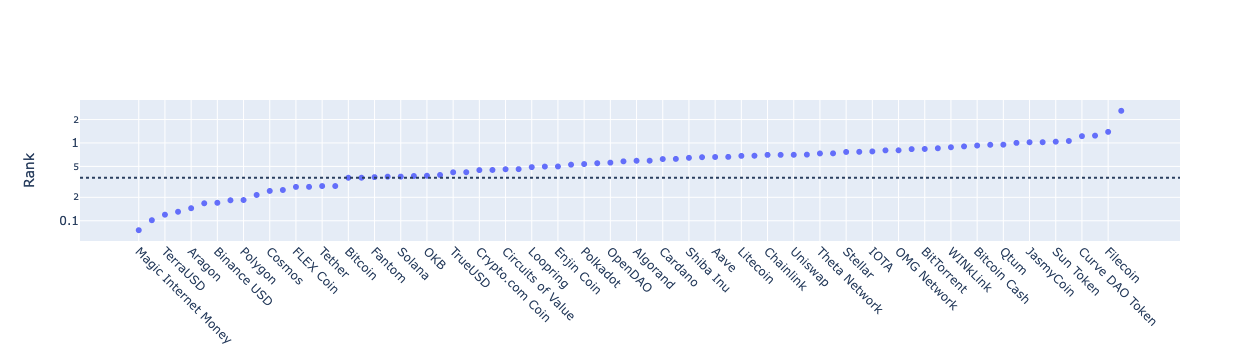

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Rank, mode='markers'))
fig.add_hline(
    y=df.loc[df['Name'] == "Bitcoin"].Rank[0],
    line_dash="dot",
)
fig.update_yaxes(title_text="Rank", type="log")
fig.update_xaxes(tickangle=45)

In [7]:
fig = go.Figure()

df1 = df[df.ATHChangePercent > -20]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))
fig.add_hline(
    y=df.iloc[0].ATHChangePercent,
    line_dash="dot",
)
fig.add_hline(
    y=df.iloc[1].ATHChangePercent,
    line_dash="dot",
)
#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

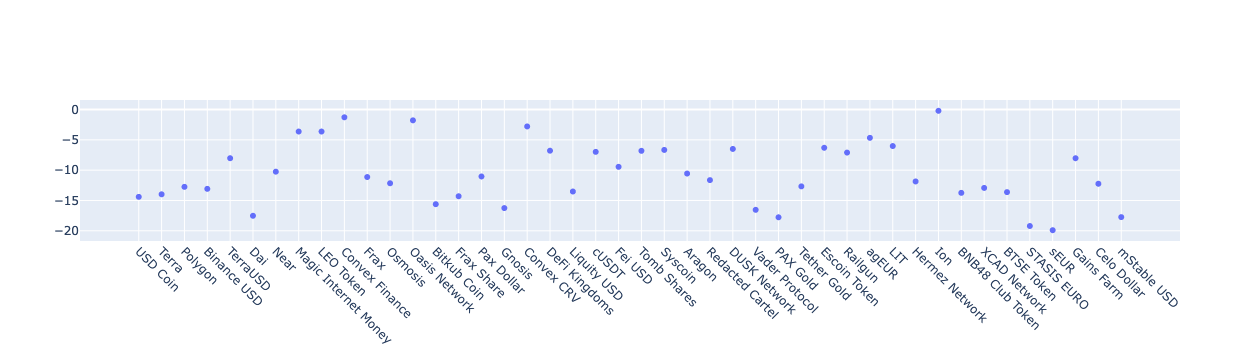

In [8]:
fig = go.Figure()

df1 = df[(df.ATHChangePercent > -20)]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))

#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
df["VolumeMarketCapRatio"] = df["Volume"] / df["MarketCap"]

In [ ]:
df.sort_values("VolumeMarketCapRatio", ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Volume, mode='markers'))
fig.add_hline(
    y=df.Volume.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.Volume.median() + df.Volume.std(),
    line_dash="dot",
)

fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.VolumeMarketCapRatio, mode='markers'))
fig.add_hline(
    y=df.VolumeMarketCapRatio.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.VolumeMarketCapRatio.median() + df.VolumeMarketCapRatio.std(),
    line_dash="dot",
)
fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)